In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import h5py

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.optimizers import Adam

%matplotlib inline

Using TensorFlow backend.


In [2]:
import pickle

train = pickle.load( open("train.p", "rb") )
test = pickle.load( open("test.p", "rb") )

x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']
shape = x_train.shape
x_train = x_train.reshape( (shape[0], shape[1], shape[2], 1) )
shape = x_test.shape
x_test = x_test.reshape( (shape[0], shape[1], shape[2], 1) )
x_train.shape[1:]

(30, 60, 1)

In [3]:
model = Sequential()

model.add( Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]) )
model.add( MaxPooling2D(pool_size=(2, 2)) )

model.add( Conv2D(48, (3, 3), activation='relu') )
model.add( MaxPooling2D(pool_size=(3, 3)) )

model.add( Flatten() )
model.add( Dense(64, activation='relu') )
model.add( Dense(32, activation='relu'))
model.add( Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 58, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 27, 48)        13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 9, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1728)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                110656    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
__________

In [5]:
model.fit(x_train, y_train,
          batch_size=1024,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 100000 samples, validate on 30000 samples
Epoch 1/10
100000/100000 [==============================] - 222s 2ms/step - loss: 0.6903 - acc: 0.5233 - val_loss: 0.6493 - val_acc: 0.6361
Epoch 2/10
100000/100000 [==============================] - 239s 2ms/step - loss: 0.5365 - acc: 0.7215 - val_loss: 0.4743 - val_acc: 0.7643
Epoch 3/10
100000/100000 [==============================] - 251s 3ms/step - loss: 0.4315 - acc: 0.7974 - val_loss: 0.3988 - val_acc: 0.8176
Epoch 4/10
100000/100000 [==============================] - 253s 3ms/step - loss: 0.3757 - acc: 0.8334 - val_loss: 0.3600 - val_acc: 0.8395
Epoch 5/10
100000/100000 [==============================] - 253s 3ms/step - loss: 0.3454 - acc: 0.8502 - val_loss: 0.3456 - val_acc: 0.8494
Epoch 6/10
100000/100000 [==============================] - 259s 3ms/step - loss: 0.3276 - acc: 0.8592 - val_loss: 0.3326 - val_acc: 0.8567
Epoch 7/10
100000/100000 [==============================] - 263s 3ms/step - loss: 0.3127 - acc: 0.8662 - val_

In [6]:
import h5py
from importlib import reload

keras.models = reload(keras.models)

In [10]:
model.save("find_sim_larger")

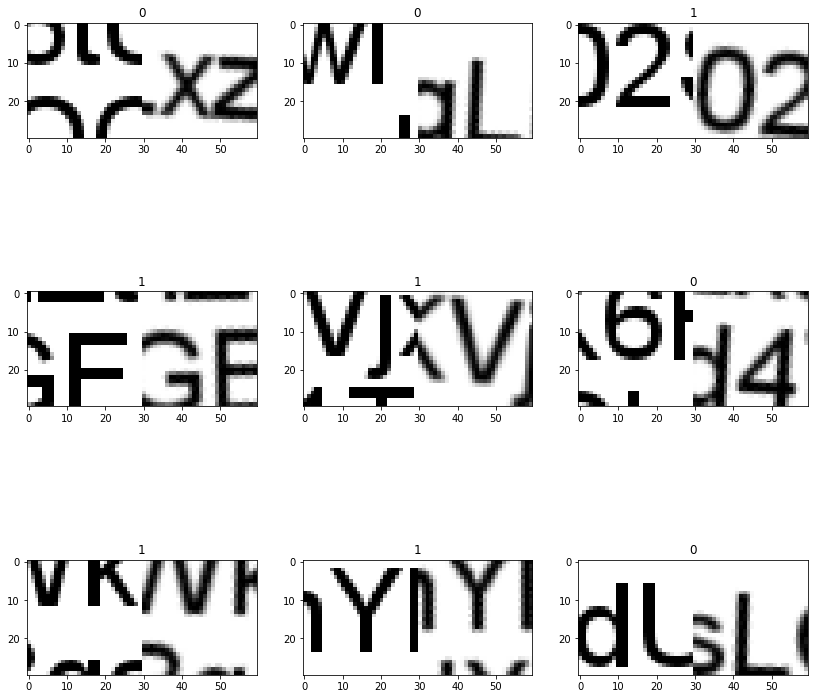

In [8]:
def draw():
    plt.figure(figsize=(14, 14))
    for i in range(1, 10):
        plt.subplot(3, 3, i)
        img = i-1
        plt.imshow(x_test[img, :, :, 0], cmap = plt.get_cmap('gray')) 
        plt.title(y_test[img])
        
draw()

In [9]:
model.predict(x_test[:9])

array([[  1.42950928e-04],
       [  5.21068687e-05],
       [  7.61896610e-01],
       [  4.75890428e-01],
       [  5.80565810e-01],
       [  4.67408076e-03],
       [  9.43133950e-01],
       [  8.62411916e-01],
       [  2.72800803e-01]], dtype=float32)